# 2.2.3. Validation of simple physics

1. Beam stretched axially under deformation.
2. Pre-stressed beam with residual curvature undergoing deformation.
3. Quasistatic case of a Timoshenko beam

In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import numpy as np
import numpy.linalg as la
from tqdm import tqdm

from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
from tqdm import tqdm

from cosserat import Cosserat

In [93]:
# Generate Animation
def make_animation(s_list, r_list, n_step):
    fig = plt.figure() 
    #ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
    ax1 = fig.add_subplot(111)
    plot, = ax1.plot([],[],'x-')
    xmax = max([np.max(ar) for ar in s_list])
    xmin = min([np.min(ar) for ar in s_list])
    ymax = max([np.max(ar) for ar in r_list])
    ymin = min([np.min(ar) for ar in r_list])
    plt.title('zy plot')
    plt.xlabel('z')
    plt.ylabel('y')
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    def animate(i):
        plot.set_data(s_list[i], r_list[i])

    anim = animation.FuncAnimation(fig, animate, frames=n_step) 
    return fig, anim

## 1. Beam Stretch

Single element is fixed at the left end, and pulled at the right with constant force.


In [100]:
from setup_val1 import setup, L_true
solution = Cosserat(**setup)

n_step = 5000               # number of step
r,v,_,_ = solution.get_state # Initial state

rs = []
vs = []
ssif = []
rs.append(r[-1,2])
vs.append(v[-1,2])
ssif.append(0)
F = solution.F
for itr in range(n_step):
    r, v, q, w = solution.step(dt=5e-4, force=F-10000*v) # 1 step   
    rs.append(r[-1,2])
    vs.append(v[-1,2])
    ssif.append(solution._ssif[-1,2])

Text(0, 0.5, 'internal normal force')

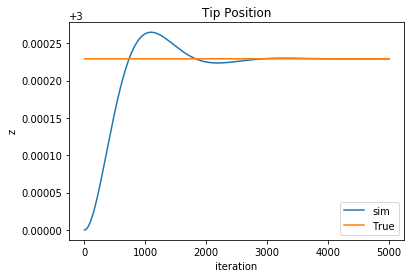

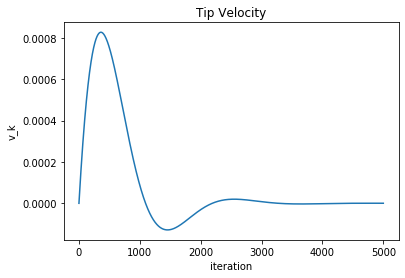

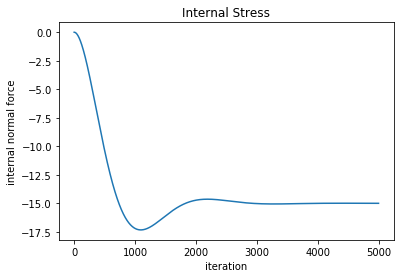

In [101]:
plt.figure()
plt.plot(rs, label='sim')
plt.plot(np.ones_like(rs)*L_true, '-,', label='True')
plt.title('Tip Position')
plt.xlabel('iteration')
plt.ylabel('z')
plt.legend()

plt.figure()
plt.plot(vs)
plt.title('Tip Velocity')
plt.xlabel('iteration')
plt.ylabel('v_k')

plt.figure()
plt.plot(ssif)
plt.title('Internal Stress')
plt.xlabel('iteration')
plt.ylabel('internal normal force')

## 2. Pre-stressed Beam

In [ ]:
from cosserat import Cosserat
from setup_val2 import setup
solution = Cosserat(**setup)

n_step = 100000               # number of step
r,v,_,_ = solution.get_state # Initial state

In [ ]:
plt.figure()
plt.plot(r[:,2], r[:,1])
plt.title('Original Shape')
plt.xlabel('z')
plt.ylabel('y')

In [ ]:
s_series = [r[:,2]]
r_series = [r[:,1]]
for itr in tqdm(range(n_step)):
    r, v, q, w = solution.step() # 1 step  
    if itr % 20 == 0:
        s_series.append(r[:,2])
        r_series.append(r[:,1])

In [ ]:
print(len(s_series))

## 3. Quasistatic case of a Timoshenko beam

In [ ]:
from setup_val3 import setup, T, s, y_sol
from tqdm import tqdm
from cosserat import Cosserat
solution = Cosserat(**setup)

r,v,q,w = solution.get_state # Initial state

In [ ]:
# plt.figure()
plt.plot(r[:,2], r[:,0])
plt.title('Original Shape')
plt.xlabel('z')
plt.ylabel('y')

In [ ]:
T=50
t=0
try:
    bar = tqdm(total=T)
    plt.figure()
    it = 0
    tipPos = []
    while t < T:
        bar.update(solution.dt)
        t += solution.dt
        r,v,q,w = solution.step()
        if it % 10000 == 0:
            _ = plt.plot(r[:,2], r[:,0])
            tipPos.append(r[-1,0])
    plt.show()
    bar.close()
except KeyboardInterrupt:
    plt.show()
    bar.close()


In [ ]:
plt.figure()
plt.plot(tipPos)
plt.title('Tip Position')
plt.xlabel('iteration')
plt.ylabel('x (i-direction)')

In [ ]:
plt.figure()
plt.plot(r[:,2], r[:,0], label='sim')
plt.plot(s, y_sol, label='true')
plt.legend()
plt.title('Final Shape')
plt.xlabel('z (k-direction)')
plt.ylabel('x (i-direction)')